### Appending Prices

In [95]:
# Create a dataframe with all the prices from years 2012-2021
import pandas as pd

# Read the csv file
prices2012 = pd.read_csv('2012prices.csv')
prices2013 = pd.read_csv('2013prices.csv')
prices2014 = pd.read_csv('2014prices.csv')
prices2015 = pd.read_csv('2015prices.csv')
prices2016 = pd.read_csv('2016prices.csv')
prices2017 = pd.read_csv('2017prices.csv')
prices2018 = pd.read_csv('2018prices.csv')
prices2019 = pd.read_csv('2019prices.csv')
prices2020 = pd.read_csv('2020prices.csv')
prices2021 = pd.read_csv('2021prices.csv')
prices_emp2012 = pd.read_csv('2012prices_emp.csv')
prices_emp2013 = pd.read_csv('2013prices_emp.csv')
prices_emp2014 = pd.read_csv('2014prices_emp.csv')
prices_emp2015 = pd.read_csv('2015prices_emp.csv')
prices_emp2016 = pd.read_csv('2016prices_emp.csv')
prices_emp2017 = pd.read_csv('2017prices_emp.csv')
prices_emp2018 = pd.read_csv('2018prices_emp.csv')
prices_emp2019 = pd.read_csv('2019prices_emp.csv')
prices_emp2020 = pd.read_csv('2020prices_emp.csv')
prices_emp2021 = pd.read_csv('2021prices_emp.csv')

# create a new dataframe with all the prices. Reset the index
prices = pd.concat([prices2012, prices2013, prices2014, prices2015, prices2016, prices2017, prices2018, prices2019, prices2020, prices2021])
prices.reset_index(drop=True, inplace=True)
prices = prices[['1']]
prices.rename(columns={'1': 'Price'}, inplace=True)

prices_emp = pd.concat([prices_emp2012, prices_emp2013, prices_emp2014, prices_emp2015, prices_emp2016, prices_emp2017, prices_emp2018, prices_emp2019, prices_emp2020, prices_emp2021])
prices_emp.reset_index(drop=True, inplace=True)
prices_emp = prices_emp[['Price']]

# Date the prices. First hour is 01:01:2012 00:00, last hour is 31:12:2021 23:00. Do not account for leap years
dates = pd.date_range(start='01/01/2012 00:00', end='31/12/2021 23:00', freq='H')
# Delete the 29th of February
dates = dates[~((dates.month == 2) & (dates.day == 29))]
prices['Date'] = dates
prices_emp['Date'] = dates
# Create a column with the year
prices['Year'] = prices['Date'].dt.year
prices_emp['Year'] = prices_emp['Date'].dt.year

print(prices)

# Save the dataframe as a csv file
prices.to_csv('prices.csv', index=False)
prices_emp.to_csv('prices_emp.csv', index=False)


           Price                Date  Year
0      25.223084 2012-01-01 00:00:00  2012
1      25.221511 2012-01-01 01:00:00  2012
2      25.222035 2012-01-01 02:00:00  2012
3      25.222560 2012-01-01 03:00:00  2012
4      25.223084 2012-01-01 04:00:00  2012
...          ...                 ...   ...
87595  29.730356 2021-12-31 19:00:00  2021
87596  29.942060 2021-12-31 20:00:00  2021
87597  29.942060 2021-12-31 21:00:00  2021
87598  29.942060 2021-12-31 22:00:00  2021
87599  29.730356 2021-12-31 23:00:00  2021

[87600 rows x 3 columns]


### Price difference

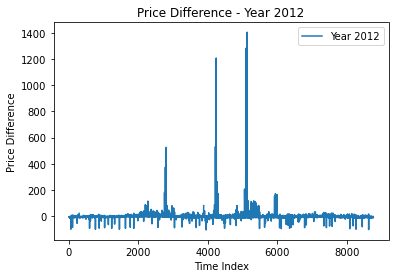

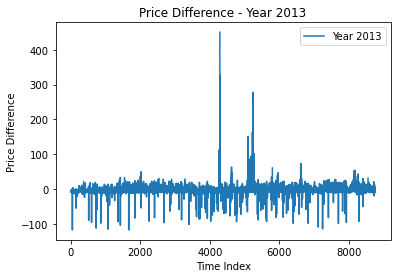

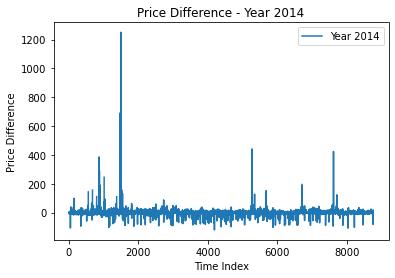

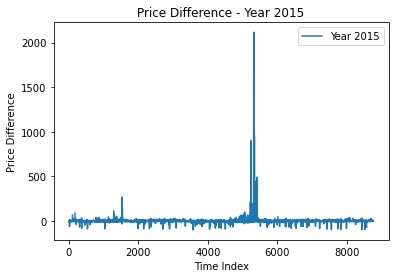

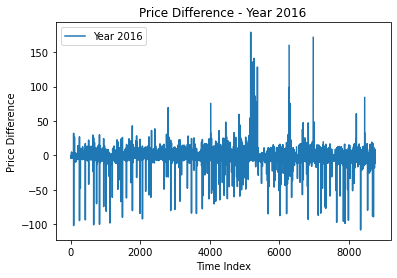

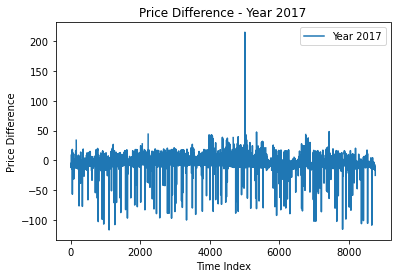

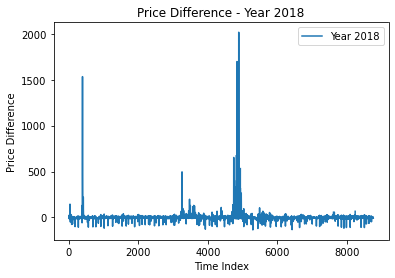

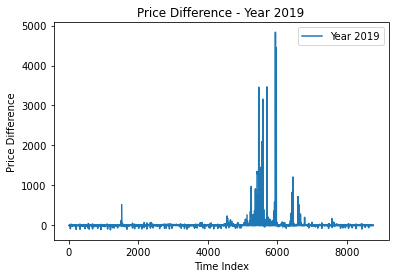

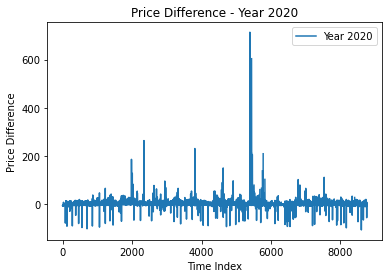

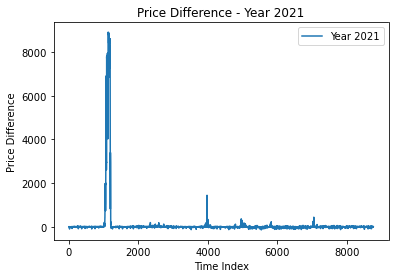

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the price difference data
price_diff_df = pd.read_csv("price_diff.csv")

# Define the range of years
years = range(2012, 2022)

# Iterate over the years
for year in years:
    # Create a new figure and axis for each plot
    fig, ax = plt.subplots()
    
    # Plot the price difference for the specific year
    ax.plot(price_diff_df["Time_Index"], price_diff_df[f"{year}Price Difference"], label=f"Year {year}")
    
    # Set labels and title
    ax.set_xlabel("Time Index")
    ax.set_ylabel("Price Difference")
    ax.set_title(f"Price Difference - Year {year}")
    
    # Add a legend
    ax.legend()
    
    # Show the plot
    plt.show()


### Simple metrics over the years

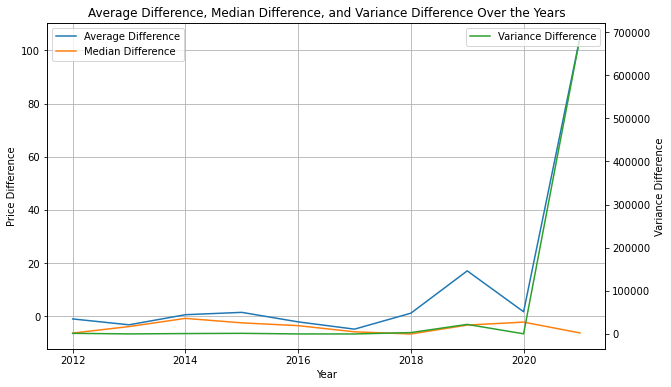

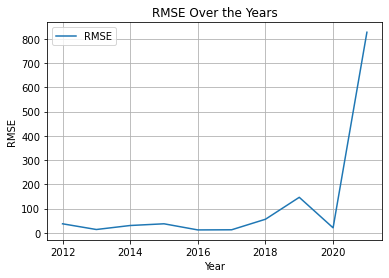

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the metrics data
metrics_df = pd.read_csv("metrics_simple.csv")

# # drop last row
# metrics_df = metrics_df[:-1]

# Define the range of years
years = metrics_df["Year"]

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Average Difference on the first axis
ax1.plot(years, metrics_df["Average Difference"], label="Average Difference", color='tab:blue')
ax1.plot(years, metrics_df["Median Difference"], label="Median Difference", color='tab:orange')
ax1.set_xlabel("Year")
ax1.set_ylabel("Price Difference")
ax1.set_title("Average Difference, Median Difference, and Variance Difference Over the Years")
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the Variance Difference on the second axis
ax2.plot(years, metrics_df["Variance Difference"], label="Variance Difference", color='tab:green')
ax2.set_ylabel("Variance Difference")
ax2.legend(loc='upper right')

plt.show()

# On a new plot, plot the RMSE for each year
plt.plot(years, metrics_df["RMSE"], label="RMSE", color='tab:blue')
plt.xlabel("Year")
plt.ylabel("RMSE")
plt.title("RMSE Over the Years")
plt.legend()
plt.grid(True)
plt.show()


### Coefficients

C:\Users\tsbon\AppData\Local\Temp\ipykernel_9632\3805040832.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_coef_unclipped[f'{year}Pearson daily'] = daily_coefficients_unclipped[f"{year}Pearson daily"]
C:\Users\tsbon\AppData\Local\Temp\ipykernel_9632\3805040832.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appended_coef_unclippedML[f'{year}Pearson daily'] = daily_coefficients_unclippedML[f"{year}Pearson daily"] #ML
C:\Users\tsbon\AppData\Local\Temp\ipykernel_9632\3805040832.py:52: Setti

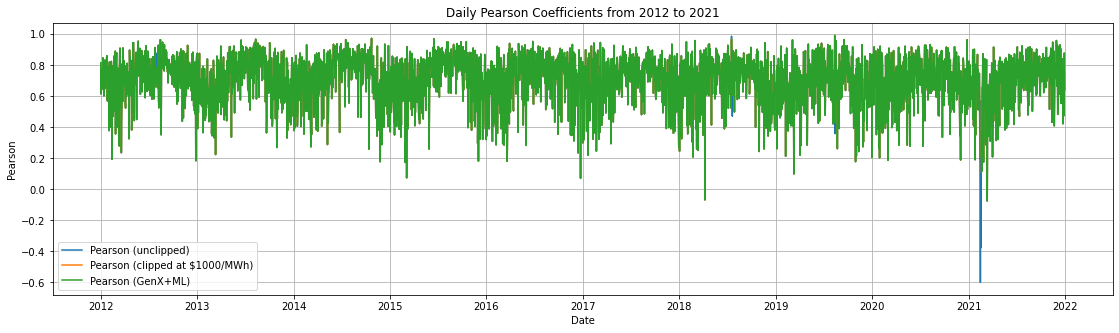

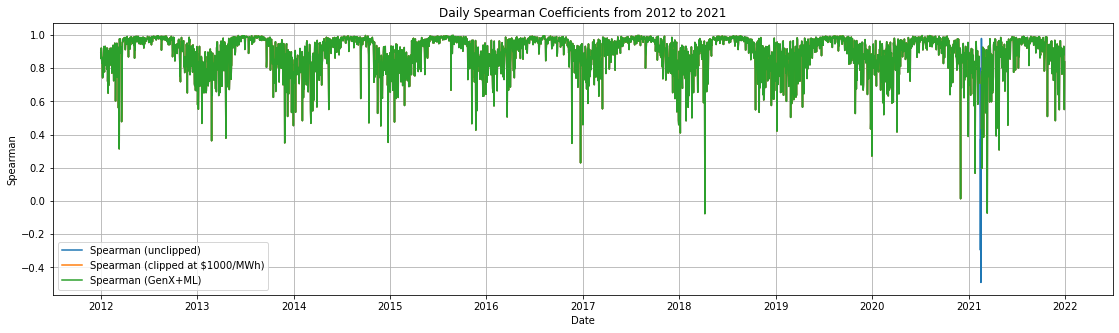

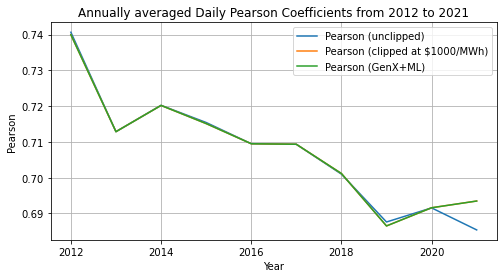

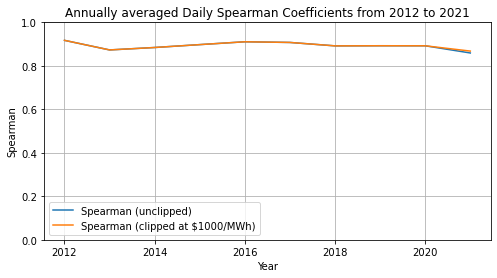

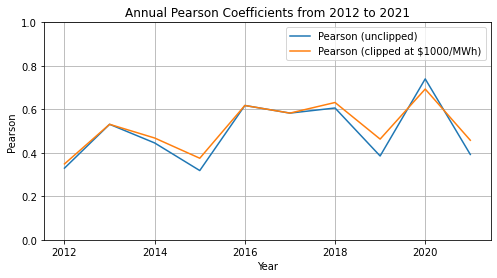

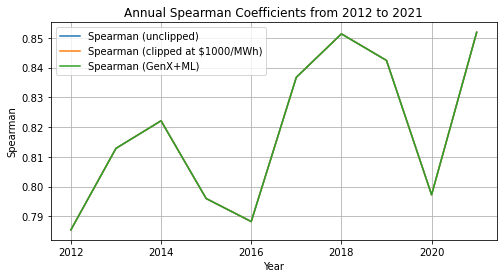

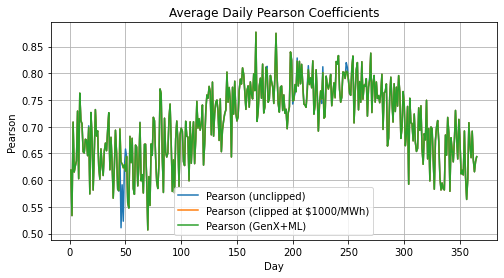

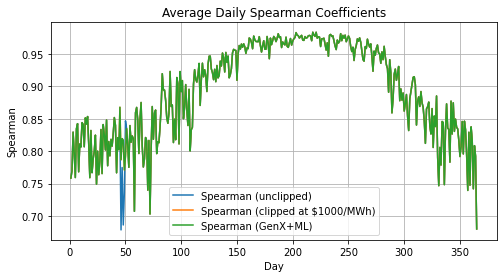

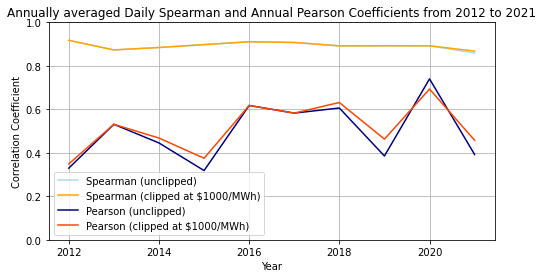

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
daily_coefficients_unclipped = pd.read_csv("daily_coefficients_unclipped.csv")
daily_coefficients_clipped1000 = pd.read_csv("daily_coefficients_clipped1000.csv")
daily_coefficients_unclippedML = pd.read_csv("daily_coefficients_unclippedML.csv") #ML
daily_coefficients_clipped1000ML = pd.read_csv("daily_coefficients_clipped1000ML.csv") #ML
annual_coefficients_unclipped = pd.read_csv("annual_coefficients_unclipped.csv")
annual_coefficients_clipped1000 = pd.read_csv("annual_coefficients_clipped1000.csv")
annual_coefficients_unclippedML = pd.read_csv("annual_coefficients_unclippedML.csv") #ML
annual_coefficients_clipped1000ML = pd.read_csv("annual_coefficients_clipped1000ML.csv") #ML

##########################################################################################
# REMOVE WHEN DOING ML
daily_coefficients_clipped1000ML = daily_coefficients_clipped1000
daily_coefficients_unclippedML = daily_coefficients_unclipped
annual_coefficients_clipped1000ML = annual_coefficients_clipped1000
annual_coefficients_unclippedML = annual_coefficients_unclipped
##########################################################################################


averaged_p_unclipped = daily_coefficients_unclipped[["Day"]]
averaged_p_clipped1000 = daily_coefficients_clipped1000[["Day"]]
averaged_p_unclippedML = daily_coefficients_unclippedML[["Day"]] #ML
averaged_p_clipped1000ML = daily_coefficients_clipped1000ML[["Day"]] #ML
averaged_s_unclipped = daily_coefficients_unclipped[["Day"]]
averaged_s_clipped1000 = daily_coefficients_clipped1000[["Day"]]
averaged_s_unclippedML = daily_coefficients_unclippedML[["Day"]] #ML
averaged_s_clipped1000ML = daily_coefficients_clipped1000ML[["Day"]] #ML
day_average_p_unclipped = daily_coefficients_unclipped[["Day"]]
day_average_p_clipped1000 = daily_coefficients_clipped1000[["Day"]]
day_average_p_unclippedML = daily_coefficients_unclippedML[["Day"]] #ML
day_average_p_clipped1000ML = daily_coefficients_clipped1000ML[["Day"]] #ML
day_average_s_unclipped = daily_coefficients_unclipped[["Day"]]
day_average_s_clipped1000 = daily_coefficients_clipped1000[["Day"]]
day_average_s_unclippedML = daily_coefficients_unclippedML[["Day"]] #ML
day_average_s_clipped1000ML = daily_coefficients_clipped1000ML[["Day"]] #ML

# Extract the years from the columns
years = range(2012, 2022)
# years = range(2013, 2022) #ML

# Put all the Pearson coefficients in a single column
appended_coef_unclipped = daily_coefficients_unclipped[["Day"]]
appended_coef_unclippedML = daily_coefficients_unclippedML[["Day"]] #ML
appended_coef_clipped1000 = daily_coefficients_clipped1000[["Day"]]
appended_coef_clipped1000ML = daily_coefficients_clipped1000ML[["Day"]] #ML
for year in years:
    appended_coef_unclipped[f'{year}Pearson daily'] = daily_coefficients_unclipped[f"{year}Pearson daily"]
    appended_coef_unclippedML[f'{year}Pearson daily'] = daily_coefficients_unclippedML[f"{year}Pearson daily"] #ML
    appended_coef_clipped1000[f'{year}Pearson daily'] = daily_coefficients_clipped1000[f"{year}Pearson daily"]
    appended_coef_clipped1000ML[f'{year}Pearson daily'] = daily_coefficients_clipped1000ML[f"{year}Pearson daily"] #ML
coefficient_pearson_unclipped = pd.melt(appended_coef_unclipped, id_vars=["Day"], var_name="Year", value_name="Coefficient")
coefficient_pearson_unclippedML = pd.melt(appended_coef_unclippedML, id_vars=["Day"], var_name="Year", value_name="Coefficient") #ML
coefficient_pearson_clipped1000 = pd.melt(appended_coef_clipped1000, id_vars=["Day"], var_name="Year", value_name="Coefficient")
coefficient_pearson_clipped1000ML = pd.melt(appended_coef_clipped1000ML, id_vars=["Day"], var_name="Year", value_name="Coefficient") #ML

# Put all the Spearman coefficients in a single column
appended_coef_unclipped = daily_coefficients_unclipped[["Day"]]
appended_coef_unclippedML = daily_coefficients_unclippedML[["Day"]] #ML
appended_coef_clipped1000 = daily_coefficients_clipped1000[["Day"]]
appended_coef_clipped1000ML = daily_coefficients_clipped1000ML[["Day"]] #ML
for year in years:
    appended_coef_unclipped[f'{year}Spearman daily'] = daily_coefficients_unclipped[f"{year}Spearman daily"]
    appended_coef_unclippedML[f'{year}Spearman daily'] = daily_coefficients_unclippedML[f"{year}Spearman daily"] #ML
    appended_coef_clipped1000[f'{year}Spearman daily'] = daily_coefficients_clipped1000[f"{year}Spearman daily"]
    appended_coef_clipped1000ML[f'{year}Spearman daily'] = daily_coefficients_clipped1000ML[f"{year}Spearman daily"] #ML
coefficient_spearman_unclipped = pd.melt(appended_coef_unclipped, id_vars=["Day"], var_name="Year", value_name="Coefficient")
coefficient_spearman_unclippedML = pd.melt(appended_coef_unclippedML, id_vars=["Day"], var_name="Year", value_name="Coefficient") #ML
coefficient_spearman_clipped1000 = pd.melt(appended_coef_clipped1000, id_vars=["Day"], var_name="Year", value_name="Coefficient")
coefficient_spearman_clipped1000ML = pd.melt(appended_coef_clipped1000ML, id_vars=["Day"], var_name="Year", value_name="Coefficient") #ML

# Date the Pearson and Spearman coefficients. First day is 01:01:2012, last day is 31:12:2021. Do not account for leap years
dates = pd.date_range(start="2012-01-01", end="2021-12-31", freq="D")
# dates = pd.date_range(start="2013-01-01", end="2021-12-31", freq="D") #ML
# Delete the 29th of February
dates = dates[~((dates.month == 2) & (dates.day == 29))]
# Add the dates to the dataframes
coefficient_pearson_unclipped["Date"] = dates
coefficient_pearson_unclippedML["Date"] = dates #ML
coefficient_spearman_unclipped["Date"] = dates
coefficient_spearman_unclippedML["Date"] = dates #ML
coefficient_pearson_clipped1000["Date"] = dates
coefficient_pearson_clipped1000ML["Date"] = dates #ML
coefficient_spearman_clipped1000["Date"] = dates
coefficient_spearman_clipped1000ML["Date"] = dates #ML

# Calculate the averaged daily coefficient for each year
for year in years:
    averaged_p_clipped1000[f"{year}Pearson daily"] = daily_coefficients_clipped1000[f"{year}Pearson daily"].mean()
    averaged_p_clipped1000ML[f"{year}Pearson daily"] = daily_coefficients_clipped1000ML[f"{year}Pearson daily"].mean() #ML
    averaged_p_unclipped[f"{year}Pearson daily"] = daily_coefficients_unclipped[f"{year}Pearson daily"].mean()
    averaged_p_unclippedML[f"{year}Pearson daily"] = daily_coefficients_unclippedML[f"{year}Pearson daily"].mean() #ML
    averaged_s_clipped1000[f"{year}Spearman daily"] = daily_coefficients_clipped1000[f"{year}Spearman daily"].mean()
    averaged_s_clipped1000ML[f"{year}Spearman daily"] = daily_coefficients_clipped1000ML[f"{year}Spearman daily"].mean() #ML
    averaged_s_unclipped[f"{year}Spearman daily"] = daily_coefficients_unclipped[f"{year}Spearman daily"].mean()
    averaged_s_unclippedML[f"{year}Spearman daily"] = daily_coefficients_unclippedML[f"{year}Spearman daily"].mean() #ML
# Keep only the first row and delete the day column
averaged_p_clipped1000 = averaged_p_clipped1000.iloc[[0]]
averaged_p_clipped1000ML = averaged_p_clipped1000ML.iloc[[0]] #ML
averaged_p_unclipped = averaged_p_unclipped.iloc[[0]]
averaged_p_unclippedML = averaged_p_unclippedML.iloc[[0]] #ML
averaged_s_clipped1000 = averaged_s_clipped1000.iloc[[0]]
averaged_s_clipped1000ML = averaged_s_clipped1000ML.iloc[[0]] #ML
averaged_s_unclipped = averaged_s_unclipped.iloc[[0]]
averaged_s_unclippedML = averaged_s_unclippedML.iloc[[0]] #ML
averaged_p_clipped1000 = averaged_p_clipped1000.drop(columns=["Day"])
averaged_p_clipped1000ML = averaged_p_clipped1000ML.drop(columns=["Day"]) #ML
averaged_p_unclipped = averaged_p_unclipped.drop(columns=["Day"])
averaged_p_unclippedML = averaged_p_unclippedML.drop(columns=["Day"]) #ML
averaged_s_clipped1000 = averaged_s_clipped1000.drop(columns=["Day"])
averaged_s_clipped1000ML = averaged_s_clipped1000ML.drop(columns=["Day"]) #ML
averaged_s_unclipped = averaged_s_unclipped.drop(columns=["Day"])
averaged_s_unclippedML = averaged_s_unclippedML.drop(columns=["Day"]) #ML

# Invert the columns and rows. Rename the columns and rows
averaged_p_clipped1000 = averaged_p_clipped1000.transpose()
averaged_p_clipped1000ML = averaged_p_clipped1000ML.transpose() #ML
averaged_p_unclipped = averaged_p_unclipped.transpose()
averaged_p_unclippedML = averaged_p_unclippedML.transpose() #ML
averaged_s_clipped1000 = averaged_s_clipped1000.transpose()
averaged_s_clipped1000ML = averaged_s_clipped1000ML.transpose() #ML
averaged_s_unclipped = averaged_s_unclipped.transpose()
averaged_s_unclippedML = averaged_s_unclippedML.transpose() #ML
averaged_p_clipped1000 = averaged_p_clipped1000.rename(columns={0: "Average Pearson (clipped at 1000$/MWh)"})
averaged_p_clipped1000ML = averaged_p_clipped1000ML.rename(columns={0: "Average Pearson (clipped at 1000$/MWh)"}) #ML
averaged_p_unclipped = averaged_p_unclipped.rename(columns={0: "Average Pearson unclipped"})
averaged_p_unclippedML = averaged_p_unclippedML.rename(columns={0: "Average Pearson unclippedML"}) #ML
averaged_s_clipped1000 = averaged_s_clipped1000.rename(columns={0: "Average Spearman (clipped at 1000$/MWh)"})
averaged_s_clipped1000ML = averaged_s_clipped1000ML.rename(columns={0: "Average Spearman (clipped at 1000$/MWh)"}) #ML
averaged_s_unclipped = averaged_s_unclipped.rename(columns={0: "Average Spearman unclipped"})
averaged_s_unclippedML = averaged_s_unclippedML.rename(columns={0: "Average Spearman unclipped"}) #ML
for year in years:
    averaged_p_clipped1000 = averaged_p_clipped1000.rename(index={f"{year}Pearson daily": year})
    averaged_p_clipped1000ML = averaged_p_clipped1000ML.rename(index={f"{year}Pearson daily": year}) #ML
    averaged_p_unclipped = averaged_p_unclipped.rename(index={f"{year}Pearson daily": year})
    averaged_p_unclippedML = averaged_p_unclippedML.rename(index={f"{year}Pearson daily": year}) #ML
    averaged_s_clipped1000 = averaged_s_clipped1000.rename(index={f"{year}Spearman daily": year})
    averaged_s_clipped1000ML = averaged_s_clipped1000ML.rename(index={f"{year}Spearman daily": year}) #ML
    averaged_s_unclipped = averaged_s_unclipped.rename(index={f"{year}Spearman daily": year})
    averaged_s_unclippedML = averaged_s_unclippedML.rename(index={f"{year}Spearman daily": year}) #ML

# Concatenate the averaged daily coefficients
annually_averaged_daily_clipped1000 = pd.concat([averaged_p_clipped1000, averaged_s_clipped1000], axis=1)
annually_averaged_daily_clipped1000ML = pd.concat([averaged_p_clipped1000ML, averaged_s_clipped1000ML], axis=1) #ML
annually_averaged_daily_unclipped = pd.concat([averaged_p_unclipped, averaged_s_unclipped], axis=1)
annually_averaged_daily_unclippedML = pd.concat([averaged_p_unclippedML, averaged_s_unclippedML], axis=1) #ML

# Save the averaged daily coefficients to a csv file
annually_averaged_daily_clipped1000.to_csv("annually_averaged_daily_clipped1000.csv")
annually_averaged_daily_unclipped.to_csv("annually_averaged_daily_unclipped.csv")
annually_averaged_daily_clipped1000ML.to_csv("annually_averaged_daily_clipped1000ML.csv") #ML
annually_averaged_daily_unclippedML.to_csv("annually_averaged_daily_unclippedML.csv") #ML

# calculate the average of the columns containing "Pearson" of the daily coefficients_clipped1000 dataframe
day_average_p_clipped1000['Average Daily Pearson (clipped at 1000$/MWh)'] = daily_coefficients_clipped1000.filter(regex="Pearson").mean(axis=1)
day_average_p_clipped1000ML['Average Daily Pearson (clipped at 1000$/MWh)'] = daily_coefficients_clipped1000ML.filter(regex="Pearson").mean(axis=1) #ML
day_average_p_unclipped['Average Daily Pearson unclipped'] = daily_coefficients_unclipped.filter(regex="Pearson").mean(axis=1)
day_average_p_unclippedML['Average Daily Pearson unclipped'] = daily_coefficients_unclippedML.filter(regex="Pearson").mean(axis=1) #ML
day_average_s_clipped1000['Average Daily Spearman (clipped at 1000$/MWh)'] = daily_coefficients_clipped1000.filter(regex="Spearman").mean(axis=1)
day_average_s_clipped1000ML['Average Daily Spearman (clipped at 1000$/MWh)'] = daily_coefficients_clipped1000ML.filter(regex="Spearman").mean(axis=1) #ML
day_average_s_unclipped['Average Daily Spearman unclipped'] = daily_coefficients_unclipped.filter(regex="Spearman").mean(axis=1)
day_average_s_unclippedML['Average Daily Spearman unclipped'] = daily_coefficients_unclippedML.filter(regex="Spearman").mean(axis=1) #ML

# Plot the Pearson coefficients for each day
plt.figure(figsize=(19, 5))
plt.plot(coefficient_pearson_unclipped["Date"], coefficient_pearson_unclipped["Coefficient"], label="Pearson (unclipped)")
plt.plot(coefficient_pearson_clipped1000["Date"], coefficient_pearson_clipped1000["Coefficient"], label="Pearson (clipped at $1000/MWh)")
plt.plot(coefficient_pearson_clipped1000ML["Date"], coefficient_pearson_clipped1000ML["Coefficient"], label="Pearson (GenX+ML)") #ML
plt.xlabel("Date")
plt.ylabel("Pearson")
plt.title("Daily Pearson Coefficients from 2012 to 2021")
# plt.title("Daily Pearson Coefficients from 2013 to 2021") #ML
plt.grid(True)
plt.legend()
plt.show()

# Plot the coefficients for each day
plt.figure(figsize=(19, 5))
plt.plot(coefficient_spearman_unclipped["Date"], coefficient_spearman_unclipped["Coefficient"], label="Spearman (unclipped)")
plt.plot(coefficient_spearman_clipped1000["Date"], coefficient_spearman_clipped1000["Coefficient"], label="Spearman (clipped at $1000/MWh)")
plt.plot(coefficient_spearman_clipped1000ML["Date"], coefficient_spearman_clipped1000ML["Coefficient"], label="Spearman (GenX+ML)") #ML
plt.xlabel("Date")
plt.ylabel("Spearman")
plt.title("Daily Spearman Coefficients from 2012 to 2021")
# plt.title("Daily Spearman Coefficients from 2013 to 2021") #ML
plt.grid(True)
plt.legend()
plt.show()

# Plot the daily averaged Pearson coefficients for each year
plt.figure(figsize=(8, 4))
plt.plot(averaged_p_unclipped.index, averaged_p_unclipped["Average Pearson unclipped"], label="Pearson (unclipped)")
plt.plot(averaged_p_clipped1000.index, averaged_p_clipped1000["Average Pearson (clipped at 1000$/MWh)"], label="Pearson (clipped at $1000/MWh)")
plt.plot(averaged_p_clipped1000ML.index, averaged_p_clipped1000ML["Average Pearson (clipped at 1000$/MWh)"], label="Pearson (GenX+ML)") #ML
plt.xlabel("Year")
plt.ylabel("Pearson")
plt.title("Annually averaged Daily Pearson Coefficients from 2012 to 2021")
# plt.title("Annually averaged Daily Pearson Coefficients from 2013 to 2021") #ML
plt.grid(True)
plt.legend()
plt.show()

# Plot the daily averaged Spearman coefficients for each year
plt.figure(figsize=(8, 4))
plt.plot(averaged_s_unclipped.index, averaged_s_unclipped["Average Spearman unclipped"], label="Spearman (unclipped)")
plt.plot(averaged_s_clipped1000.index, averaged_s_clipped1000["Average Spearman (clipped at 1000$/MWh)"], label="Spearman (clipped at $1000/MWh)")
# plt.plot(averaged_s_clipped1000ML.index, averaged_s_clipped1000ML["Average Spearman (clipped at 1000$/MWh)"], label="Spearman (GenX+ML)") #ML
plt.xlabel("Year")
plt.ylabel("Spearman")
plt.title("Annually averaged Daily Spearman Coefficients from 2012 to 2021")
# plt.title("Annually averaged Daily Spearman Coefficients from 2013 to 2021") #ML
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

# Plot the average Pearson coefficients for each year
plt.figure(figsize=(8, 4))
plt.plot(annual_coefficients_unclipped['Year'], annual_coefficients_unclipped["Pearson annual"], label="Pearson (unclipped)")
plt.plot(annual_coefficients_clipped1000['Year'], annual_coefficients_clipped1000["Pearson annual"], label="Pearson (clipped at $1000/MWh)")
# plt.plot(annual_coefficients_clipped1000ML['Year'], annual_coefficients_clipped1000ML["Pearson annual"], label="Pearson (GenX+ML)") #ML
plt.xlabel("Year")
plt.ylabel("Pearson")
plt.title("Annual Pearson Coefficients from 2012 to 2021")
# plt.title("Annual Pearson Coefficients from 2013 to 2021") #ML
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

# Plot the average Spearman coefficients for each year
plt.figure(figsize=(8, 4))
plt.plot(annual_coefficients_unclipped['Year'], annual_coefficients_unclipped["Spearman annual"], label="Spearman (unclipped)")
plt.plot(annual_coefficients_clipped1000['Year'], annual_coefficients_clipped1000["Spearman annual"], label="Spearman (clipped at $1000/MWh)")
plt.plot(annual_coefficients_clipped1000ML['Year'], annual_coefficients_clipped1000ML["Spearman annual"], label="Spearman (GenX+ML)") #ML
plt.xlabel("Year")
plt.ylabel("Spearman")
plt.title("Annual Spearman Coefficients from 2012 to 2021")
# plt.title("Annual Spearman Coefficients from 2013 to 2021") #ML
plt.grid(True)
plt.legend()
plt.show()

# Plot the average Pearson coefficients for each day
plt.figure(figsize=(8, 4))
plt.plot(day_average_p_unclipped['Day'], day_average_p_unclipped["Average Daily Pearson unclipped"], label="Pearson (unclipped)")
plt.plot(day_average_p_clipped1000['Day'], day_average_p_clipped1000["Average Daily Pearson (clipped at 1000$/MWh)"], label="Pearson (clipped at $1000/MWh)")
plt.plot(day_average_p_clipped1000ML['Day'], day_average_p_clipped1000ML["Average Daily Pearson (clipped at 1000$/MWh)"], label="Pearson (GenX+ML)") #ML
plt.xlabel("Day")
plt.ylabel("Pearson")
plt.title("Average Daily Pearson Coefficients")
plt.grid(True)
plt.legend()
plt.show()

# Plot the average Spearman coefficients for each day
plt.figure(figsize=(8, 4))
plt.plot(day_average_s_unclipped['Day'], day_average_s_unclipped["Average Daily Spearman unclipped"], label="Spearman (unclipped)")
plt.plot(day_average_s_clipped1000['Day'], day_average_s_clipped1000["Average Daily Spearman (clipped at 1000$/MWh)"], label="Spearman (clipped at $1000/MWh)")
plt.plot(day_average_s_clipped1000ML['Day'], day_average_s_clipped1000ML["Average Daily Spearman (clipped at 1000$/MWh)"], label="Spearman (GenX+ML)") #ML
plt.xlabel("Day")
plt.ylabel("Spearman")
plt.title("Average Daily Spearman Coefficients")
plt.grid(True)
plt.legend()
plt.show()

# Plot the yearly averaged daily Spearman and the annual Pearson coefficients, unclipped and clipped at 1000$/MWh
light_blue = '#ADD8E6'
dark_blue = '#000080'
light_orange = '#FFA500'
dark_orange = '#FF4500'
plt.figure(figsize=(8, 4))
plt.plot(averaged_s_unclipped.index, averaged_s_unclipped["Average Spearman unclipped"], color=light_blue, label="Spearman (unclipped)")
plt.plot(averaged_s_clipped1000.index, averaged_s_clipped1000["Average Spearman (clipped at 1000$/MWh)"], color=light_orange, label="Spearman (clipped at $1000/MWh)")
plt.plot(annual_coefficients_unclipped['Year'], annual_coefficients_unclipped["Pearson annual"], color= dark_blue, label="Pearson (unclipped)")
plt.plot(annual_coefficients_clipped1000['Year'], annual_coefficients_clipped1000["Pearson annual"], color= dark_orange, label="Pearson (clipped at $1000/MWh)")
plt.xlabel("Year")
plt.ylabel("Correlation Coefficient")
plt.title("Annually averaged Daily Spearman and Annual Pearson Coefficients from 2012 to 2021")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()




### Price distribution

2012


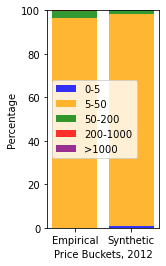

2013


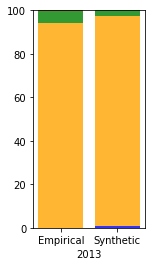

2014


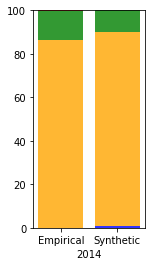

2015


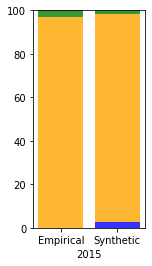

2016


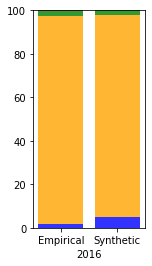

2017


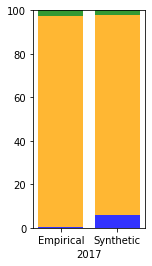

2018


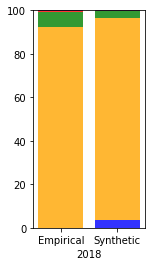

2019


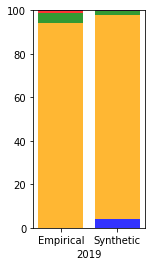

2020


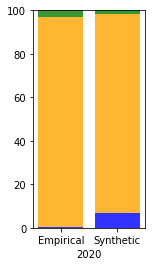

2021


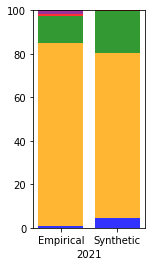

2012


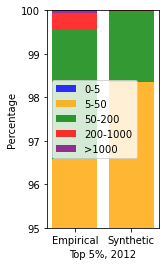

2013


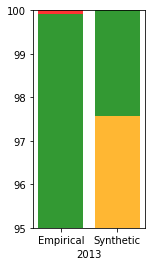

2014


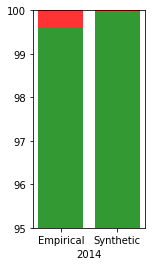

2015


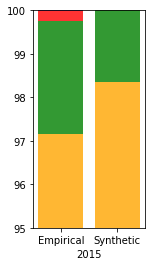

2016


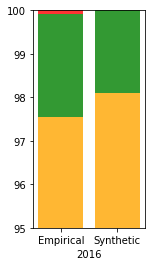

2017


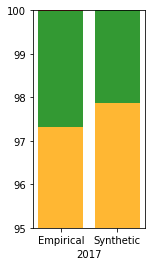

2018


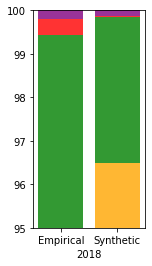

2019


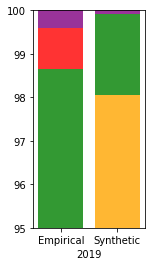

2020


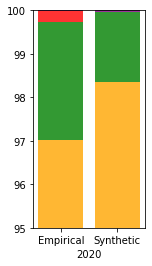

2021


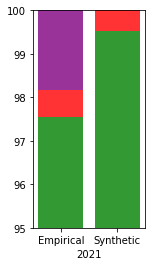

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

years = range(2012, 2022)

for year in years:

    # Replace 'prices_emp.csv' and 'prices.csv' with the paths to your empirical and synthetic price CSV files
    empirical_prices_file = f'{year}prices_emp.csv'
    synthetic_prices_file = f'{year}prices.csv'

    # Load empirical prices and synthetic prices into DataFrames
    df_empirical = pd.read_csv(empirical_prices_file)
    df_synthetic = pd.read_csv(synthetic_prices_file)
    df_synthetic.rename(columns={'1': 'Price'}, inplace=True)

    # Date the prices. First hour is 01:01:year 00:00, last hour is 31:12:year 23:00. Do not account for leap years
    dates = pd.date_range(start=f'01/01/{year} 00:00', end=f'31/12/{year} 23:00', freq='H')
    # Delete the 29th of February
    dates = dates[~((dates.month == 2) & (dates.day == 29))]
    df_synthetic['Date'] = dates
    df_empirical['Date'] = dates
    # Create a column with the year
    df_synthetic['Year'] = df_synthetic['Date'].dt.year
    df_empirical['Year'] = df_empirical['Date'].dt.year

    # Create a new csv file with the top 10% empirical and synthetic prices
    def create_top10_csv(file_name, df):
        # Sort the DataFrame by prices in descending order
        df = df.sort_values(by='Price', ascending=False)
        
        # Calculate the number of rows that make up 10% of the DataFrame
        ten_percent = int(len(df) * 0.05)
        
        # Create a new DataFrame with the top 10% of prices
        df_top10 = df.iloc[:ten_percent]
        
        # Save the new DataFrame to a csv file
        df_top10.to_csv(file_name, index=False)
        
        return df_top10

    create_top10_csv(f'top10_emp{year}.csv', df_empirical)
    create_top10_csv(f'top10_synt{year}.csv', df_synthetic)

    bucket1 = pd.DataFrame()
    bucket2 = pd.DataFrame()
    bucket3 = pd.DataFrame()
    bucket4 = pd.DataFrame()
    bucket5 = pd.DataFrame()

    # Function to create buckets based on price values
    def create_buckets(price):
        if price <= 5:
            return '0-5'
        elif price <= 50:
            return '5-50'
        elif price <= 200:
            return '50-200'
        elif price <= 1000:
            return '200-1000'
        else:
            return '1000'

    # Apply the bucket function to create a new column 'bucket' for both DataFrames
    df_empirical['bucket'] = df_empirical['Price'].apply(create_buckets)
    df_synthetic['bucket'] = df_synthetic['Price'].apply(create_buckets)

    # Group the data by 'bucket' and count the occurrences
    empirical_counts = df_empirical['bucket'].value_counts().sort_index()
    synthetic_counts = df_synthetic['bucket'].value_counts().sort_index()

    # Get all unique buckets from both DataFrames
    all_buckets = sorted(set(empirical_counts.index) | set(synthetic_counts.index))

    # # If there are buckets that are not present in one of the DataFrames, add them with a count of 0
    # for bucket in all_buckets:
    #     if bucket not in empirical_counts.index:
    #         empirical_counts[bucket] = 0
    #     if bucket not in synthetic_counts.index:
    #         synthetic_counts[bucket] = 0

    # Fill missing buckets with 0 count
    empirical_counts = empirical_counts.reindex(all_buckets, fill_value=0)
    synthetic_counts = synthetic_counts.reindex(all_buckets, fill_value=0)

    # If the bucket '1000' is empty, add it with a count of 0
    if '1000' not in empirical_counts.index:
        empirical_counts['1000'] = 0
    if '1000' not in synthetic_counts.index:
        synthetic_counts['1000'] = 0


    # Do the shit
    # Create a DataFrame for each bucket with "Empirical" and "Synthetic" as indices
    df_buckets = pd.DataFrame({'Empirical': empirical_counts, 'Synthetic': synthetic_counts})

    #  Create a DataFrame for each bucket with "Empirical" and "Synthetic" as indices
    df_bucket_0_5 = pd.DataFrame({'Count': [empirical_counts['0-5'], synthetic_counts['0-5']]},
                                index=['Empirical', 'Synthetic'])
    df_bucket_5_50 = pd.DataFrame({'Count': [empirical_counts['5-50'], synthetic_counts['5-50']]},
                                index=['Empirical', 'Synthetic'])
    df_bucket_50_200 = pd.DataFrame({'Count': [empirical_counts['50-200'], synthetic_counts['50-200']]},
                                    index=['Empirical', 'Synthetic'])
    df_bucket_200_1000 = pd.DataFrame({'Count': [empirical_counts['200-1000'], synthetic_counts['200-1000']]},
                                    index=['Empirical', 'Synthetic'])
    df_bucket_1000 = pd.DataFrame({'Count': [empirical_counts['1000'], synthetic_counts['1000']]},
                                index=['Empirical', 'Synthetic'])

    # Work with percentages
    df_bucket_0_5['Percentage'] = df_bucket_0_5['Count'] / len(df_empirical) * 100
    df_bucket_5_50['Percentage'] = df_bucket_5_50['Count'] / len(df_empirical) * 100
    df_bucket_50_200['Percentage'] = df_bucket_50_200['Count'] / len(df_empirical) * 100
    df_bucket_200_1000['Percentage'] = df_bucket_200_1000['Count'] / len(df_empirical) * 100
    df_bucket_1000['Percentage'] = df_bucket_1000['Count'] / len(df_empirical) * 100

    print(year)

    # Plotting the stacked bar chart
    fig, ax = plt.subplots(figsize=(2, 4))

    # Set the width of the bars
    bar_width = 0.8

    # Create evenly spaced positions for each bucket category
    bar_positions = np.arange(len(df_bucket_0_5))
    tick_labels = ['Empirical', 'Synthetic']

    # Plot the bars for empirical prices and synthetic prices, adjusting the bottom parameter for each bar
    ax.bar(bar_positions, df_bucket_0_5['Percentage'], bar_width, label='0-5', alpha=0.8, color='blue')
    ax.bar(bar_positions, df_bucket_5_50['Percentage'], bar_width, bottom=df_bucket_0_5['Percentage'], label='5-50', alpha=0.8, color='orange')
    ax.bar(bar_positions, df_bucket_50_200['Percentage'], bar_width, bottom=df_bucket_0_5['Percentage'] + df_bucket_5_50['Percentage'], label='50-200', alpha=0.8, color='green')
    ax.bar(bar_positions, df_bucket_200_1000['Percentage'], bar_width, bottom=df_bucket_0_5['Percentage'] + df_bucket_5_50['Percentage'] + df_bucket_50_200['Percentage'], label='200-1000', alpha=0.8, color='red')
    ax.bar(bar_positions, df_bucket_1000['Percentage'], bar_width, bottom=df_bucket_0_5['Percentage'] + df_bucket_5_50['Percentage'] + df_bucket_50_200['Percentage'] + df_bucket_200_1000['Percentage'], label='>1000', alpha=0.8, color='purple')

    # Customize the plot
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(tick_labels)
    ax.set_ylim(0, 100)
    if year == 2012:
    #     # Add a legend not on the plot, on the right side
        ax.legend(loc='center left', bbox_to_anchor=(0, 0.5))
        ax.set_xlabel('Price Buckets, 2012')
        ax.set_ylabel('Percentage')
    else:
        ax.set_xlabel(f'{year}')
    # plt.tight_layout()
    plt.show()

for year in years:

    # Replace 'prices_emp.csv' and 'prices.csv' with the paths to your empirical and synthetic price CSV files
    empirical_prices_file = f'top10_emp{year}.csv'
    synthetic_prices_file = f'top10_synt{year}.csv'

    # Load empirical prices and synthetic prices into DataFrames
    df_empirical = pd.read_csv(empirical_prices_file)
    df_synthetic = pd.read_csv(synthetic_prices_file)
    df_synthetic.rename(columns={'1': 'Price'}, inplace=True)

    # # Date the prices. First hour is 01:01:year 00:00, last hour is 31:12:year 23:00. Do not account for leap years
    # dates = pd.date_range(start=f'01/01/{year} 00:00', end=f'31/12/{year} 23:00', freq='H')
    # # Delete the 29th of February
    # dates = dates[~((dates.month == 2) & (dates.day == 29))]
    # df_synthetic['Date'] = dates
    # df_empirical['Date'] = dates
    # # Create a column with the year
    # df_synthetic['Year'] = df_synthetic['Date'].dt.year
    # df_empirical['Year'] = df_empirical['Date'].dt.year

    bucket1 = pd.DataFrame()
    bucket2 = pd.DataFrame()
    bucket3 = pd.DataFrame()
    bucket4 = pd.DataFrame()
    bucket5 = pd.DataFrame()

    # Function to create buckets based on price values
    def create_buckets(price):
        if price <= 5:
            return '0-5'
        elif price <= 50:
            return '5-50'
        elif price <= 200:
            return '50-200'
        elif price <= 1000:
            return '200-1000'
        else:
            return '1000'

    # Apply the bucket function to create a new column 'bucket' for both DataFrames
    df_empirical['bucket'] = df_empirical['Price'].apply(create_buckets)
    df_synthetic['bucket'] = df_synthetic['Price'].apply(create_buckets)

    # Group the data by 'bucket' and count the occurrences
    empirical_counts = df_empirical['bucket'].value_counts().sort_index()
    synthetic_counts = df_synthetic['bucket'].value_counts().sort_index()

    # Get all unique buckets from both DataFrames
    all_buckets = sorted(set(empirical_counts.index) | set(synthetic_counts.index))

    # # If there are buckets that are not present in one of the DataFrames, add them with a count of 0
    # for bucket in all_buckets:
    #     if bucket not in empirical_counts.index:
    #         empirical_counts[bucket] = 0
    #     if bucket not in synthetic_counts.index:
    #         synthetic_counts[bucket] = 0

    # Fill missing buckets with 0 count
    empirical_counts = empirical_counts.reindex(all_buckets, fill_value=0)
    synthetic_counts = synthetic_counts.reindex(all_buckets, fill_value=0)
    
    # If the bucket '1000' is empty, add it with a count of 0
    if '0-5' not in empirical_counts.index:
        empirical_counts['0-5'] = 0
    if '0-5' not in synthetic_counts.index:
        synthetic_counts['0-5'] = 0
    if '5-50' not in empirical_counts.index:
        empirical_counts['5-50'] = 0
    if '5-50' not in synthetic_counts.index:
        synthetic_counts['5-50'] = 0
    if '50-200' not in empirical_counts.index:
        empirical_counts['50-200'] = 0
    if '50-200' not in synthetic_counts.index:
        synthetic_counts['50-200'] = 0
    if '200-1000' not in empirical_counts.index:
        empirical_counts['200-1000'] = 0
    if '200-1000' not in synthetic_counts.index:
        synthetic_counts['200-1000'] = 0
    if '1000' not in empirical_counts.index:
        empirical_counts['1000'] = 0
    if '1000' not in synthetic_counts.index:
        synthetic_counts['1000'] = 0


    # Do the shit
    # Create a DataFrame for each bucket with "Empirical" and "Synthetic" as indices
    df_buckets = pd.DataFrame({'Empirical': empirical_counts, 'Synthetic': synthetic_counts})

    #  Create a DataFrame for each bucket with "Empirical" and "Synthetic" as indices
    df_bucket_0_5 = pd.DataFrame({'Count': [empirical_counts['0-5'], synthetic_counts['0-5']]},
                                index=['Empirical', 'Synthetic'])
    df_bucket_5_50 = pd.DataFrame({'Count': [empirical_counts['5-50'], synthetic_counts['5-50']]},
                                index=['Empirical', 'Synthetic'])
    df_bucket_50_200 = pd.DataFrame({'Count': [empirical_counts['50-200'], synthetic_counts['50-200']]},
                                    index=['Empirical', 'Synthetic'])
    df_bucket_200_1000 = pd.DataFrame({'Count': [empirical_counts['200-1000'], synthetic_counts['200-1000']]},
                                    index=['Empirical', 'Synthetic'])
    df_bucket_1000 = pd.DataFrame({'Count': [empirical_counts['1000'], synthetic_counts['1000']]},
                                index=['Empirical', 'Synthetic'])

    # number of hour in a year
    n=8760
    # Work with percentages
    df_bucket_0_5['Percentage'] = df_bucket_0_5['Count'] / n * 100 + 95
    df_bucket_5_50['Percentage'] = df_bucket_5_50['Count'] / n * 100
    df_bucket_50_200['Percentage'] = df_bucket_50_200['Count'] / n * 100
    df_bucket_200_1000['Percentage'] = df_bucket_200_1000['Count'] / n * 100
    df_bucket_1000['Percentage'] = df_bucket_1000['Count'] / n * 100

    print(year)

    # Plotting the stacked bar chart
    fig, ax = plt.subplots(figsize=(2, 4))

    # Set the width of the bars
    bar_width = 0.8

    # Create evenly spaced positions for each bucket category
    bar_positions = np.arange(len(df_bucket_0_5))
    tick_labels = ['Empirical', 'Synthetic']

    # Plot the bars for empirical prices and synthetic prices, adjusting the bottom parameter for each bar
    ax.bar(bar_positions, df_bucket_0_5['Percentage'], bar_width, label='0-5', alpha=0.8, color='blue')
    ax.bar(bar_positions, df_bucket_5_50['Percentage'], bar_width, bottom=df_bucket_0_5['Percentage'], label='5-50', alpha=0.8, color='orange')
    ax.bar(bar_positions, df_bucket_50_200['Percentage'], bar_width, bottom=df_bucket_0_5['Percentage'] + df_bucket_5_50['Percentage'], label='50-200', alpha=0.8, color='green')
    ax.bar(bar_positions, df_bucket_200_1000['Percentage'], bar_width, bottom=df_bucket_0_5['Percentage'] + df_bucket_5_50['Percentage'] + df_bucket_50_200['Percentage'], label='200-1000', alpha=0.8, color='red')
    ax.bar(bar_positions, df_bucket_1000['Percentage'], bar_width, bottom=df_bucket_0_5['Percentage'] + df_bucket_5_50['Percentage'] + df_bucket_50_200['Percentage'] + df_bucket_200_1000['Percentage'], label='>1000', alpha=0.8, color='purple')

    # Customize the plot
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(tick_labels)
    # set y range
    ax.set_ylim(95, 100)
    if year == 2012:
    #     # Add a legend not on the plot, on the right side
        ax.legend(loc='center left', bbox_to_anchor=(0, 0.5))
        ax.set_xlabel('Top 5%, 2012')
        ax.set_ylabel('Percentage')
    else:
        ax.set_xlabel(f'{year}')
    # plt.tight_layout()
    plt.show()



### Price plotting

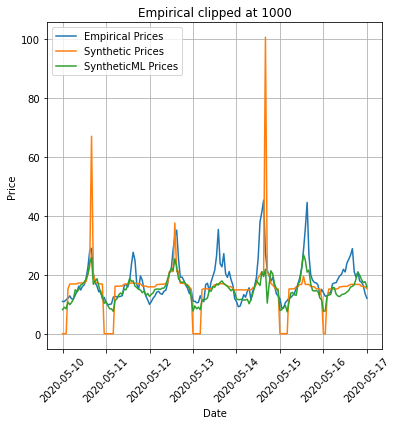

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Assuming the files are in the same directory as your notebook
empirical_prices_file = "prices_emp.csv"
synthetic_prices_file = "prices.csv"
synthetic_pricesML_file = "pricesML.csv"

# Read data from CSV files into Pandas DataFrames
empirical_prices = pd.read_csv(empirical_prices_file)
synthetic_prices = pd.read_csv(synthetic_prices_file)
synthetic_pricesML = pd.read_csv(synthetic_pricesML_file)

# clip the highest prices from the synthetic dataset to nsynt
nsynth = 1000
synthetic_prices['Price'] = synthetic_prices['Price'].clip(upper=nsynth)

# clip the syntheticML prices to nsynt
synthetic_pricesML['Price'] = synthetic_pricesML['Price'].clip(upper=nsynth)

# clip the empirical prices to nemp. Count the number of prices that are clipped
nemp = 1000
empirical_prices['Price'] = empirical_prices['Price'].clip(upper=nemp)

# Convert the "Date" column to a proper datetime format
empirical_prices["Date"] = pd.to_datetime(empirical_prices["Date"])
synthetic_prices["Date"] = pd.to_datetime(synthetic_prices["Date"])
synthetic_pricesML["Date"] = pd.to_datetime(synthetic_pricesML["Date"])

# Filter the data based on the desired date range
start_date = "2020-05-10"
end_date = "2020-05-17"

empirical_prices_filtered = empirical_prices[(empirical_prices["Date"] >= start_date) & (empirical_prices["Date"] <= end_date)]
synthetic_prices_filtered = synthetic_prices[(synthetic_prices["Date"] >= start_date) & (synthetic_prices["Date"] <= end_date)]
synthetic_pricesML_filtered = synthetic_pricesML[(synthetic_pricesML["Date"] >= start_date) & (synthetic_pricesML["Date"] <= end_date)]

# Plot the data on the same graph
plt.figure(figsize=(6, 6))
plt.plot(empirical_prices_filtered["Date"], empirical_prices_filtered["Price"], label="Empirical Prices")
plt.plot(synthetic_prices_filtered["Date"], synthetic_prices_filtered["Price"], label="Synthetic Prices")
plt.plot(synthetic_pricesML_filtered["Date"], synthetic_pricesML_filtered["Price"], label="SyntheticML Prices")

plt.xlabel("Date")
# Make the date label incline 45 degrees
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.title("Empirical clipped at 1000")
plt.legend()
plt.grid(True)
plt.show()
